## Logistic Regression with TensorFlow-Keras

Implementing Logistic Regression Model from scratch utilizing the base mathematical functions and auto-gradient utility of TensorFlow (Keras).

In [347]:
# libraries
import numpy as np
np.random.seed(2**32-1)
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf

In [348]:
# Creating a 2-D synthetic data 
# 2 features, and binary class

positive_samples = np.random.multivariate_normal(mean=[0.5, 2.], cov=[[1, 0.5], [0.5, 1]], size=1000)
negative_samples = np.random.multivariate_normal(mean=[2., 0.5], cov=[[1, 0.5], [0.5, 1]], size=1000)

X = np.vstack((positive_samples, negative_samples)).astype(np.float32)
y = np.vstack((np.ones((1000, 1), dtype="float32"), np.zeros((1000, 1), dtype="float32")))

In [349]:
data = pd.DataFrame(data=X, columns=["f1", "f2"])
data["target"] = y
data.target = data.target.astype(int)

data = data.sample(frac=1.0)

y = data.target.values
X = data.drop(columns=["target"]).values

data.sample(5)

,f1,f2,target
442,-0.259643,1.784072,1
1781,3.203279,-0.071050,0
1137,2.965478,1.300353,0
1129,-0.115382,-1.338408,0
698,1.026496,0.992661,1


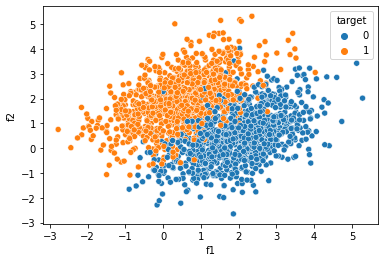

In [350]:
# Plotting the 2D data seaparated in 2-classes: training data
g1 = sns.scatterplot(x="f1", y="f2", hue="target", data=data);

In [359]:
class LogisticRegression:
    """Logistic Regression Model"""

    def __init__(self, iterations=10, learning_rate=0.1):
        self.iterations = iterations
        self.learning_rate = learning_rate

    def fit(self, X, y, plot_loss=True):
        """
            Fits a Logistic Regression Model, finds best set of W and b.
            If plot_loss = True, a plot of loss during the training is returned at the end.
        """

        n_feature, n_out = X.shape[1], 1
        self.W = tf.Variable(initial_value=tf.random.normal(mean=0, stddev=1, shape=(n_feature, n_out)))
        self.b = tf.Variable(initial_value=tf.random.normal(mean=0, stddev=1, shape=(n_out, )))

        # model output = softmax(z(X) = WX  + b)
        model = lambda W, b: tf.nn.sigmoid(tf.matmul(X, W) + b)   
        
        # tracking loss
        loss_list = []; epochs = []
        for e in range(self.iterations):
            with tf.GradientTape() as tape:
                predictions = model(self.W, self.b)  
                loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y, predictions))

            # gradients: dL/dW and dL/db
            dloss_dw, dloss_db = tape.gradient(loss, [self.W, self.b])

            # update the weights (W) and biases (b)
            self.W.assign_sub(dloss_dw * self.learning_rate)
            self.b.assign_sub(dloss_db * self.learning_rate)

            # saving loss
            loss_list.append(loss)
            epochs.append(e)

        self.coeff_ = (self.W.numpy(), self.b.numpy())

        # plotting loss during the training
        if plot_loss:
            fig, ax = plt.subplots(1, 1, figsize=(5, 3))
            ax.plot(epochs, loss_list)
            ax.set_xlabel("Epoch")
            ax.set_ylabel("Loss")
            ax.set_title("Loss during the training")
            plt.show()


    def predict(self, X, score=False):
        hz = tf.nn.sigmoid(tf.matmul(X, self.W) + self.b).numpy()
        if score:
            return hz
        else:
            return np.where(hz > 0.5, 1, 0)

In [360]:
# To tf Tensors
_y = tf.convert_to_tensor(y.reshape(len(y), 1), dtype="float32")
_X = tf.convert_to_tensor(X, dtype="float32")

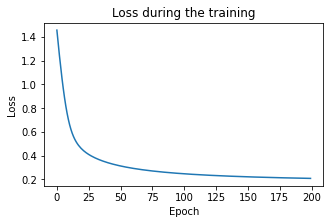

In [361]:
model = LogisticRegression(iterations=200, learning_rate=0.1)
model.fit(_X, _y)

In [362]:
# fitted model parameters: W, b
model.coeff_

(array([[-1.9627926],
        [ 1.556165 ]], dtype=float32), array([0.66254115], dtype=float32))

In [363]:
# prediction by the model: on same training data
y_pred = model.predict(_X, score=False).flatten()

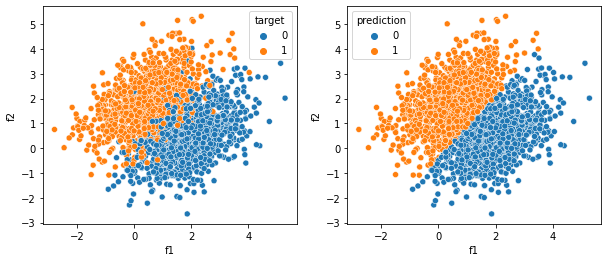

In [364]:
# plotting the class separation by the model
tmp = pd.DataFrame(data={"f1": X[:, 0], "f2": X[:, 1], "prediction": y_pred})

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x="f1", y="f2", hue="target", data=data, ax=ax1);
sns.scatterplot(x="f1", y="f2", hue="prediction", data=tmp, ax=ax2);

In [365]:
# Classification Accuracy:
accuracy = lambda targets, predictions: (targets == predictions).sum()/len(targets)

In [366]:
accuracy(y.flatten(), y_pred)

0.9245

In [ ]:
# Done